In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mortgage_path = "Input_Files/Mortgage_Rates-Annual.csv"
all_houses_path = "Input_Files/All_House_Sale_Price-Annual.csv"
income_path = "Input_Files/Median_Household_Income-Annual.csv"

mortgage_data = pd.read_csv(mortgage_path)
all_houses = pd.read_csv(all_houses_path)
income = pd.read_csv(income_path)

In [3]:
mortgage_data.head()
all_houses.head()
income.head()

,DATE,MEHOINUSA672N
0,1984-01-01,55828
1,1985-01-01,56871
2,1986-01-01,58920
3,1987-01-01,59624
4,1988-01-01,60115


In [4]:
merge_data = pd.merge(pd.merge(all_houses, mortgage_data, on="DATE"),income,on="DATE")
merge_data.head()

,DATE,MSPUS,MORTGAGE30US,MEHOINUSA672N
0,1984-01-01,78200.0,13.8776923076923077,55828
1,1985-01-01,82800.0,12.4301923076923077,56871
2,1986-01-01,88000.0,10.1873076923076923,58920
3,1987-01-01,97900.0,10.2133962264150943,59624
4,1988-01-01,110000.0,10.3417307692307692,60115


In [5]:
merge_data = merge_data.rename(columns={"DATE" : "Date" , "MSPUS" : "Median Home Sale Price" , "MORTGAGE30US" : "Mortgage Rate", "MEHOINUSA672N" : "Median Household Income"}) 
merge_data.head()

,Date,Median Home Sale Price,Mortgage Rate,Median Household Income
0,1984-01-01,78200.0,13.8776923076923077,55828
1,1985-01-01,82800.0,12.4301923076923077,56871
2,1986-01-01,88000.0,10.1873076923076923,58920
3,1987-01-01,97900.0,10.2133962264150943,59624
4,1988-01-01,110000.0,10.3417307692307692,60115


In [6]:
merge_data['Date'] = merge_data['Date'].astype('datetime64[D]')
merge_data['Median Household Income'] = merge_data['Median Household Income'].astype(float)
merge_data['Mortgage Rate'] = merge_data['Mortgage Rate'].astype(float)
merge_data['Mortgage Rate'] = merge_data['Mortgage Rate'].round(2)
merge_data.tail()

,Date,Median Home Sale Price,Mortgage Rate,Median Household Income
33,2017-01-01,313100.0,3.99,67571.0
34,2018-01-01,331800.0,4.54,68168.0
35,2019-01-01,313000.0,3.94,72808.0
36,2020-01-01,329000.0,3.11,71186.0
37,2021-01-01,369800.0,2.96,70784.0


In [7]:
time = merge_data["Date"]
home_price = merge_data["Median Home Sale Price"]
income_data = merge_data["Median Household Income"]
mortgage_data = merge_data["Mortgage Rate"]

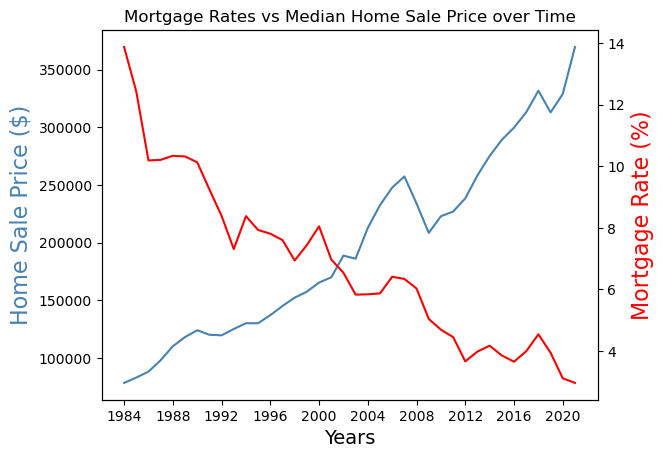

In [12]:

#define colors to use
col1 = 'steelblue'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(time, home_price, color=col1)

#add x-axis label
ax.set_xlabel('Years', fontsize=14)

#add y-axis label
ax.set_ylabel('Home Sale Price ($)', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(time, mortgage_data, color=col2)

#add second y-axis label
ax2.set_ylabel('Mortgage Rate (%)', color=col2, fontsize=16)
plt.title('Mortgage Rates vs Median Home Sale Price over Time')
plt.savefig("Images/Mortgage Rate($).png")
plt.show()


Analysis: Mortgage Rates are inverse to the Median Home Sale Price over time.  Mortgage Rates have continued to decline whereas the price of homes has continued to increase.

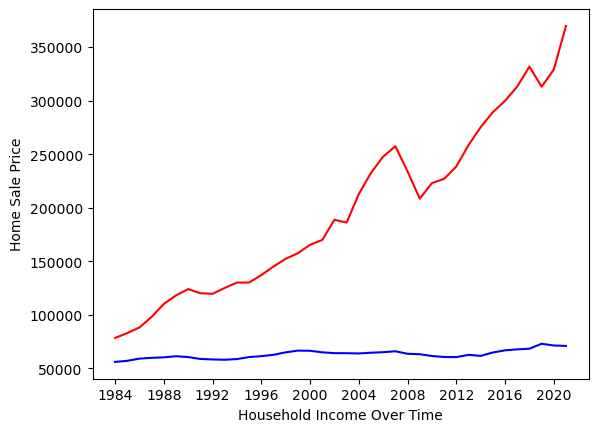

In [13]:
homes, = plt.plot(time, home_price, color="red", label="Median Home Sales Price")
income, = plt.plot(time, income_data, color="blue", label="Median Household Income")
plt.xlabel('Household Income Over Time')
plt.ylabel('Home Sale Price')
plt.savefig("Images/Household Income($).png")
plt.show()

Analysis: Home Prices have continued to go up over time whereas Household Income is relatvely flat.  